In [173]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
%matplotlib inline
from scipy.signal import find_peaks
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('ComparisonGroupComments_Split.csv')
# Understand the basic information of dataset and the data types involved
df['Comment_Time'] = pd.to_datetime(df['Comment_Time'], format='%Y-%m-%d %H:%M:%S')
df.head(3)

User_ID Cause_of_Death       Last_Post_Time        Comment_Time  \
0   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 22:10:51   
1   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 16:21:28   
2   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 14:26:33   

   Relative_Elapsed_Time Commenter_Name  \
0                    0.0        光明绘海Emi   
1                    0.0         郑先生的灯泡   
2                    0.0       搁浅-color   

                                             Comment  Tree_Hole  Wailing_Wall  \
0            我朋友有家猫咖，二楼阳台左边门没关，家里有哥哥姐姐四五位，脾气都很好，你记得来          1             0   
1  第一次见你介绍自己说叫“旧书”，听你做草坪上弹我的吉他，我们一起在山礼跳舞，给活动帮忙。。。...          0             1   
2                               他最后还在祝国家繁荣昌盛，多么温柔的人啊          0             1   

   Not_Related                                     Comments_Split  
0            0   我,朋友,家,猫,咖,二,楼,阳台,左边,门,关,家里,哥哥,姐姐,四五位,脾气,很好,你,记得  
1            0  第一次,见,你,介绍,自己,说,叫,“,旧书,”,听,你,做,草坪,上,弹,我,吉他,我们,...  
2            0                          他,最后,还在,祝,国家,繁荣昌盛,多么,温柔,人

In [175]:
df_tree_hole = df
df_whaling_wall = df

df_tree_hole = df_tree_hole[df_tree_hole['Tree_Hole'] == 1]
df_whaling_wall = df_whaling_wall[df_whaling_wall['Wailing_Wall'] == 1]

df_unique_tree_hole = df[(df['Tree_Hole'] == 1) & (df['Wailing_Wall'] == 0)]
df_unique_whaling_wall = df[(df['Tree_Hole'] == 0) & (df['Wailing_Wall'] == 1)]
df_both = df[(df['Tree_Hole'] == 1) & (df['Wailing_Wall'] == 1)]
df_none = df[(df['Tree_Hole'] == 0) & (df['Wailing_Wall'] == 0)]

In [176]:
df_whaling_wall.head(3)


User_ID Cause_of_Death       Last_Post_Time        Comment_Time  \
1   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 16:21:28   
2   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 14:26:33   
6   红烧土豆叶    学业压力/抑郁症/自杀  2020-10-13 02:00:00 2020-10-13 11:28:28   

   Relative_Elapsed_Time Commenter_Name  \
1                    0.0         郑先生的灯泡   
2                    0.0       搁浅-color   
6                    0.0       阿呀biubiu   

                                             Comment  Tree_Hole  Wailing_Wall  \
1  第一次见你介绍自己说叫“旧书”，听你做草坪上弹我的吉他，我们一起在山礼跳舞，给活动帮忙。。。...          0             1   
2                               他最后还在祝国家繁荣昌盛，多么温柔的人啊          0             1   
6  实验设备总有问题，研究下一步怎么做全靠自己查文献，实验数据没有意义，学校不止一个这样的学生，...          0             1   

   Not_Related                                     Comments_Split  
1            0  第一次,见,你,介绍,自己,说,叫,“,旧书,”,听,你,做,草坪,上,弹,我,吉他,我们,...  
2            0                          他,最后,还在,祝,国家,繁荣昌盛,多么,温柔,人  
6            0  实验设备,总有,问题,研究,下一步,怎么做,全靠,自己,查,文献,实验,数据,没有,意义,学...

## **Words Distribution**

#### **All**

In [177]:
df_explode = df['Comments_Split'].str.split(',', expand=True)
df_explode_value = list(df_explode.values.ravel())
df_explode_value = [x for x in df_explode_value if x is not None]
df_explode_value = [x for x in df_explode_value if str(x) != '']
df_explode_value = [x for x in df_explode_value if str(x) != ' ']
df_explode_value = [x for x in df_explode_value if str(x) != 'nan']
df_explode_value = [x for x in df_explode_value if str(x) != '，']
df_explode_value = [x for x in df_explode_value if str(x) != '。']
df_explode_value = [x for x in df_explode_value if str(x) != '.']
df_explode_value = [x for x in df_explode_value if str(x) != '…']
df_explode_value_raw = pd.DataFrame(df_explode_value)
df_explode_count = pd.DataFrame(df_explode_value_raw.value_counts())
df_word_display = df_explode_count
df_word_display = df_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_word_display = df_word_display.rename(columns={0:'Words','Count':'All'})
df_word_display.head(50)

Words   All
0      我  3351
1      你  3122
2     自己   537
3      人   529
4     希望   477
5      他   401
6     我们   356
7     真的   326
8      想   316
9     世界   314
10    一个   306
11     说   304
12     好   301
13    没有   295
14    这个   268
15    快乐   267
16     被   260
17    如果   254
18    可以   253
19    现在   249
20     她   223
21     过   220
22    今天   220
23    还是   218
24    活着   214
25    他们   204
26    看到   201
27    已经   190
28    朋友   187
29     做   186
30    你们   185
31     再   184
32    孩子   184
33    觉得   179
34    父母   177
35    喜欢   171
36    生活   168
37    一定   165
38    但是   163
39    时候   163
40    微博   161
41     爱   161
42    就是   157
43     把   157
44     走   155
45     对   155
46   不知道   155
47    知道   154
48    不要   150
49     里   144

#### **Unique Tree Hole**

In [178]:
df_unique_tree_hole_explode = df_unique_tree_hole['Comments_Split'].str.split(',', expand=True)
df_unique_tree_hole_explode_value = list(df_unique_tree_hole_explode.values.ravel())
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if x is not None]
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != 'nan']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != '']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != '，']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != '。']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != '.']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if str(x) != '…']
df_unique_tree_hole_explode_value = [x for x in df_unique_tree_hole_explode_value if x != ' ']
df_unique_tree_hole_explode_value_raw = pd.DataFrame(df_unique_tree_hole_explode_value)
df_unique_tree_hole_explode_count = pd.DataFrame(df_unique_tree_hole_explode_value_raw.value_counts())
df_unique_tree_hole_word_display = df_unique_tree_hole_explode_count
df_unique_tree_hole_word_display = df_unique_tree_hole_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_unique_tree_hole_word_display = df_unique_tree_hole_word_display.rename(columns={0:'Words','Count':'Unique Tree Hole'})
df_unique_tree_hole_word_display

Words  Unique Tree Hole
0        我              1795
1        你               420
2       自己               298
3        人               270
4        想               169
...    ...               ...
6174    星星                 1
6175    星河                 1
6176    星球                 1
6177     春                 1
6178    🦐连                 1

[6179 rows x 2 columns]

#### **Unique Wailing Wall**

In [179]:
df_unique_wailing_wall_explode = df_unique_whaling_wall['Comments_Split'].str.split(',', expand=True)
df_unique_wailing_wall_explode_value = list(df_unique_wailing_wall_explode.values.ravel())
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if x is not None]
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != 'nan']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != '']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != '，']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != '。']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != '.']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if str(x) != '…']
df_unique_wailing_wall_explode_value = [x for x in df_unique_wailing_wall_explode_value if x != ' ']
df_unique_wailing_wall_explode_value_raw = pd.DataFrame(df_unique_wailing_wall_explode_value)
df_unique_wailing_wall_explode_count = pd.DataFrame(df_unique_wailing_wall_explode_value_raw.value_counts())
df_unique_wailing_wall_word_display = df_unique_wailing_wall_explode_count
df_unique_wailing_wall_word_display = df_unique_wailing_wall_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_unique_wailing_wall_word_display = df_unique_wailing_wall_word_display.rename(columns={0:'Words','Count':'Unique Wailing Wall'})
df_unique_wailing_wall_word_display.head(50)

Words  Unique Wailing Wall
0      你                 2336
1      我                  995
2     希望                  275
3     我们                  205
4      人                  172
5     世界                  166
6     自己                  163
7      他                  151
8     快乐                  149
9     可以                  139
10    没有                  132
11    一个                  130
12     好                  129
13    如果                  127
14    真的                  123
15    看到                  115
16    一定                  108
17     做                  107
18     想                  107
19     说                  105
20    这个                  105
21     过                  103
22    今天                  102
23     愿                  101
24    现在                   96
25    他们                   96
26    姐姐                   95
27    还是                   93
28    微博                   93
29   下辈子                   90
30    已经                   89
31     再                   87
32    你们                   85
33    活着                   80
34    离开                   79
35    喜欢                   78
36     爱                   78
37    想你                   78
38    开心                   76
39     被                   74
40     小                   73
41    孩子                   73
42    朋友                   73
43    不要                   70
44    美好                   70
45    幸福                   70
46     她                   69
47    时候                   68
48    但是                   67
49    还有                   67

#### **Both**

In [180]:
df_both_explode = df_both['Comments_Split'].str.split(',', expand=True)
df_both_explode_value = list(df_both_explode.values.ravel())
df_both_explode_value = [x for x in df_both_explode_value if x is not None]
df_both_explode_value = [x for x in df_both_explode_value if str(x) != 'nan']
df_both_explode_value = [x for x in df_both_explode_value if str(x) != '']
df_both_explode_value = [x for x in df_both_explode_value if str(x) != '，']
df_both_explode_value = [x for x in df_both_explode_value if str(x) != '。']
df_both_explode_value = [x for x in df_both_explode_value if str(x) != '.']
df_both_explode_value = [x for x in df_both_explode_value if str(x) != '…']
df_both_explode_value = [x for x in df_both_explode_value if x != ' ']
df_both_explode_value_raw = pd.DataFrame(df_both_explode_value)
df_both_explode_count = pd.DataFrame(df_both_explode_value_raw.value_counts())
df_both_word_display = df_both_explode_count
df_both_word_display = df_both_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_both_word_display = df_both_word_display.rename(columns={0:'Words','Count':'Both'})
df_both_word_display.head(50)

Words  Both
0      我   513
1      你   333
2     自己    69
3      他    64
4      人    61
5     希望    55
6     快乐    52
7     今天    52
8     我们    51
9      好    49
10     过    41
11    一个    40
12    真的    39
13     被    39
14    晚安    38
15     说    35
16    孩子    34
17     想    34
18    现在    33
19    喜欢    33
20    世界    32
21    没有    31
22    但是    29
23    生活    28
24    如果    27
25    活着    26
26    还是    26
27     走    25
28    这个    24
29    知道    23
30    已经    23
31    觉得    23
32    妹妹    23
33    微博    21
34    还有    21
35    一直    21
36    好好    21
37    可以    21
38    开心    20
39    你们    20
40    看到    20
41    父母    20
42     对    20
43     做    20
44     饭    20
45    可能    19
46    离开    19
47     把    19
48    时候    18
49    他们    18

In [181]:
df_words_all_explode_count = pd.merge(df_word_display, df_unique_tree_hole_word_display, on='Words', how='outer')
df_words_all_explode_count = pd.merge(df_words_all_explode_count, df_unique_wailing_wall_word_display, on='Words', how='outer')
df_words_all_explode_count = pd.merge(df_words_all_explode_count, df_both_word_display, on='Words', how='outer')
df_words_all_explode_count = df_words_all_explode_count.fillna(0)
df_words_all_explode_count.head(60)

Words   All  Unique Tree Hole  Unique Wailing Wall   Both
0      我  3351            1795.0                995.0  513.0
1      你  3122             420.0               2336.0  333.0
2     自己   537             298.0                163.0   69.0
3      人   529             270.0                172.0   61.0
4     希望   477             130.0                275.0   55.0
5      他   401             141.0                151.0   64.0
6     我们   356              86.0                205.0   51.0
7     真的   326             154.0                123.0   39.0
8      想   316             169.0                107.0   34.0
9     世界   314             112.0                166.0   32.0
10    一个   306             129.0                130.0   40.0
11     说   304             146.0                105.0   35.0
12     好   301             116.0                129.0   49.0
13    没有   295             124.0                132.0   31.0
14    这个   268             121.0                105.0   24.0
15    快乐   267              63.0                149.0   52.0
16     被   260             141.0                 74.0   39.0
17    如果   254              88.0                127.0   27.0
18    可以   253              82.0                139.0   21.0
19    现在   249             109.0                 96.0   33.0
20     她   223             117.0                 69.0   11.0
21     过   220              72.0                103.0   41.0
22    今天   220              64.0                102.0   52.0
23    还是   218              93.0                 93.0   26.0
24    活着   214             106.0                 80.0   26.0
25    他们   204              81.0                 96.0   18.0
26    看到   201              56.0                115.0   20.0
27    已经   190              64.0                 89.0   23.0
28    朋友   187              69.0                 73.0   17.0
29     做   186              57.0                107.0   20.0
30    你们   185              63.0                 85.0   20.0
31     再   184              79.0                 87.0    6.0
32    孩子   184              71.0                 73.0   34.0
33    觉得   179             100.0                 49.0   23.0
34    父母   177              92.0                 51.0   20.0
35    喜欢   171              55.0                 78.0   33.0
36    生活   168              85.0                 53.0   28.0
37    一定   165              37.0                108.0   18.0
38    但是   163              62.0                 67.0   29.0
39    时候   163              72.0                 68.0   18.0
40    微博   161              33.0                 93.0   21.0
41     爱   161              63.0                 78.0   17.0
42    就是   157              91.0                 47.0   15.0
43     把   157              68.0                 62.0   19.0
44     走   155              68.0                 59.0   25.0
45     对   155              80.0                 45.0   20.0
46   不知道   155              76.0                 55.0   17.0
47    知道   154              65.0                 57.0   23.0
48    不要   150              50.0                 70.0   15.0
49     里   144              59.0                 54.0   17.0
50    开心   143              47.0                 76.0   20.0
51    离开   143              43.0                 79.0   19.0
52    痛苦   140              79.0                 43.0   17.0
53    因为   140              69.0                 55.0   14.0
54    一直   137              53.0                 62.0   21.0
55    难过   135              77.0                 44.0   10.0
56    大家   135              67.0                 46.0    9.0
57     得   135              60.0                 58.0   16.0
58     上   135              63.0                 55.0   11.0
59     愿   134              22.0                101.0   11.0

In [182]:
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '.'].index) 
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '…'].index)
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '对'].index)
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '做'].index)
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '过'].index)
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '好'].index)
df_words_all_explode_count = df_words_all_explode_count.drop(df_words_all_explode_count[df_words_all_explode_count['Words'] == '一个'].index)

In [183]:
df_words_all_explode_count.reset_index(drop=True,inplace=True)
df_words_all_explode_count.head(60)

Words   All  Unique Tree Hole  Unique Wailing Wall   Both
0      我  3351            1795.0                995.0  513.0
1      你  3122             420.0               2336.0  333.0
2     自己   537             298.0                163.0   69.0
3      人   529             270.0                172.0   61.0
4     希望   477             130.0                275.0   55.0
5      他   401             141.0                151.0   64.0
6     我们   356              86.0                205.0   51.0
7     真的   326             154.0                123.0   39.0
8      想   316             169.0                107.0   34.0
9     世界   314             112.0                166.0   32.0
10     说   304             146.0                105.0   35.0
11    没有   295             124.0                132.0   31.0
12    这个   268             121.0                105.0   24.0
13    快乐   267              63.0                149.0   52.0
14     被   260             141.0                 74.0   39.0
15    如果   254              88.0                127.0   27.0
16    可以   253              82.0                139.0   21.0
17    现在   249             109.0                 96.0   33.0
18     她   223             117.0                 69.0   11.0
19    今天   220              64.0                102.0   52.0
20    还是   218              93.0                 93.0   26.0
21    活着   214             106.0                 80.0   26.0
22    他们   204              81.0                 96.0   18.0
23    看到   201              56.0                115.0   20.0
24    已经   190              64.0                 89.0   23.0
25    朋友   187              69.0                 73.0   17.0
26    你们   185              63.0                 85.0   20.0
27     再   184              79.0                 87.0    6.0
28    孩子   184              71.0                 73.0   34.0
29    觉得   179             100.0                 49.0   23.0
30    父母   177              92.0                 51.0   20.0
31    喜欢   171              55.0                 78.0   33.0
32    生活   168              85.0                 53.0   28.0
33    一定   165              37.0                108.0   18.0
34    但是   163              62.0                 67.0   29.0
35    时候   163              72.0                 68.0   18.0
36    微博   161              33.0                 93.0   21.0
37     爱   161              63.0                 78.0   17.0
38    就是   157              91.0                 47.0   15.0
39     把   157              68.0                 62.0   19.0
40     走   155              68.0                 59.0   25.0
41   不知道   155              76.0                 55.0   17.0
42    知道   154              65.0                 57.0   23.0
43    不要   150              50.0                 70.0   15.0
44     里   144              59.0                 54.0   17.0
45    开心   143              47.0                 76.0   20.0
46    离开   143              43.0                 79.0   19.0
47    痛苦   140              79.0                 43.0   17.0
48    因为   140              69.0                 55.0   14.0
49    一直   137              53.0                 62.0   21.0
50    难过   135              77.0                 44.0   10.0
51    大家   135              67.0                 46.0    9.0
52     得   135              60.0                 58.0   16.0
53     上   135              63.0                 55.0   11.0
54     愿   134              22.0                101.0   11.0
55    都是   132              64.0                 47.0   16.0
56    还有   131              41.0                 67.0   21.0
57    不是   130              52.0                 54.0   16.0
58    不会   124              58.0                 49.0   15.0
59     为   123              42.0                 61.0   14.0

In [184]:
df_words_all_explode_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10432 entries, 0 to 10431
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Words                10432 non-null  object 
 1   All                  10432 non-null  int64  
 2   Unique Tree Hole     10432 non-null  float64
 3   Unique Wailing Wall  10432 non-null  float64
 4   Both                 10432 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 407.6+ KB


In [185]:
df_words_unique_tree_hole_explode_count = df_words_all_explode_count[['Words','Unique Tree Hole']]
df_words_unique_tree_hole_explode_count = df_words_unique_tree_hole_explode_count.sort_values(by=['Unique Tree Hole'], ascending=False)
df_words_unique_tree_hole_explode_count = df_words_unique_tree_hole_explode_count.reset_index(drop=True)
df_words_unique_tree_hole_explode_count.head()

Words  Unique Tree Hole
0     我            1795.0
1     你             420.0
2    自己             298.0
3     人             270.0
4     想             169.0

In [186]:
df_words_unique_wailing_wall_explode_count = df_words_all_explode_count[['Words','Unique Wailing Wall']]
df_words_unique_wailing_wall_explode_count = df_words_unique_wailing_wall_explode_count.sort_values(by=['Unique Wailing Wall'], ascending=False)
df_words_unique_wailing_wall_explode_count = df_words_unique_wailing_wall_explode_count.reset_index(drop=True)
df_words_unique_wailing_wall_explode_count.head()

Words  Unique Wailing Wall
0     你               2336.0
1     我                995.0
2    希望                275.0
3    我们                205.0
4     人                172.0

In [187]:
df_words_both_explode_count = df_words_all_explode_count[['Words','Both']]
df_words_both_explode_count = df_words_both_explode_count.sort_values(by=['Both'], ascending=False)
df_words_both_explode_count = df_words_both_explode_count.reset_index(drop=True)
df_words_both_explode_count.head()

Words   Both
0     我  513.0
1     你  333.0
2    自己   69.0
3     他   64.0
4     人   61.0

In [188]:
#Translate Emojis
from emojiswitch import emojize, demojize
df_words_unique_tree_hole_explode_count['Words'] = df_words_unique_tree_hole_explode_count['Words'].apply(lambda x: demojize(x, delimiters=('[',']'), lang='zh'))
df_words_unique_wailing_wall_explode_count['Words'] = df_words_unique_wailing_wall_explode_count['Words'].apply(lambda x: demojize(x, delimiters=('[',']'), lang='zh'))
df_words_both_explode_count['Words'] = df_words_both_explode_count['Words'].apply(lambda x: demojize(x, delimiters=('[',']'), lang='zh'))

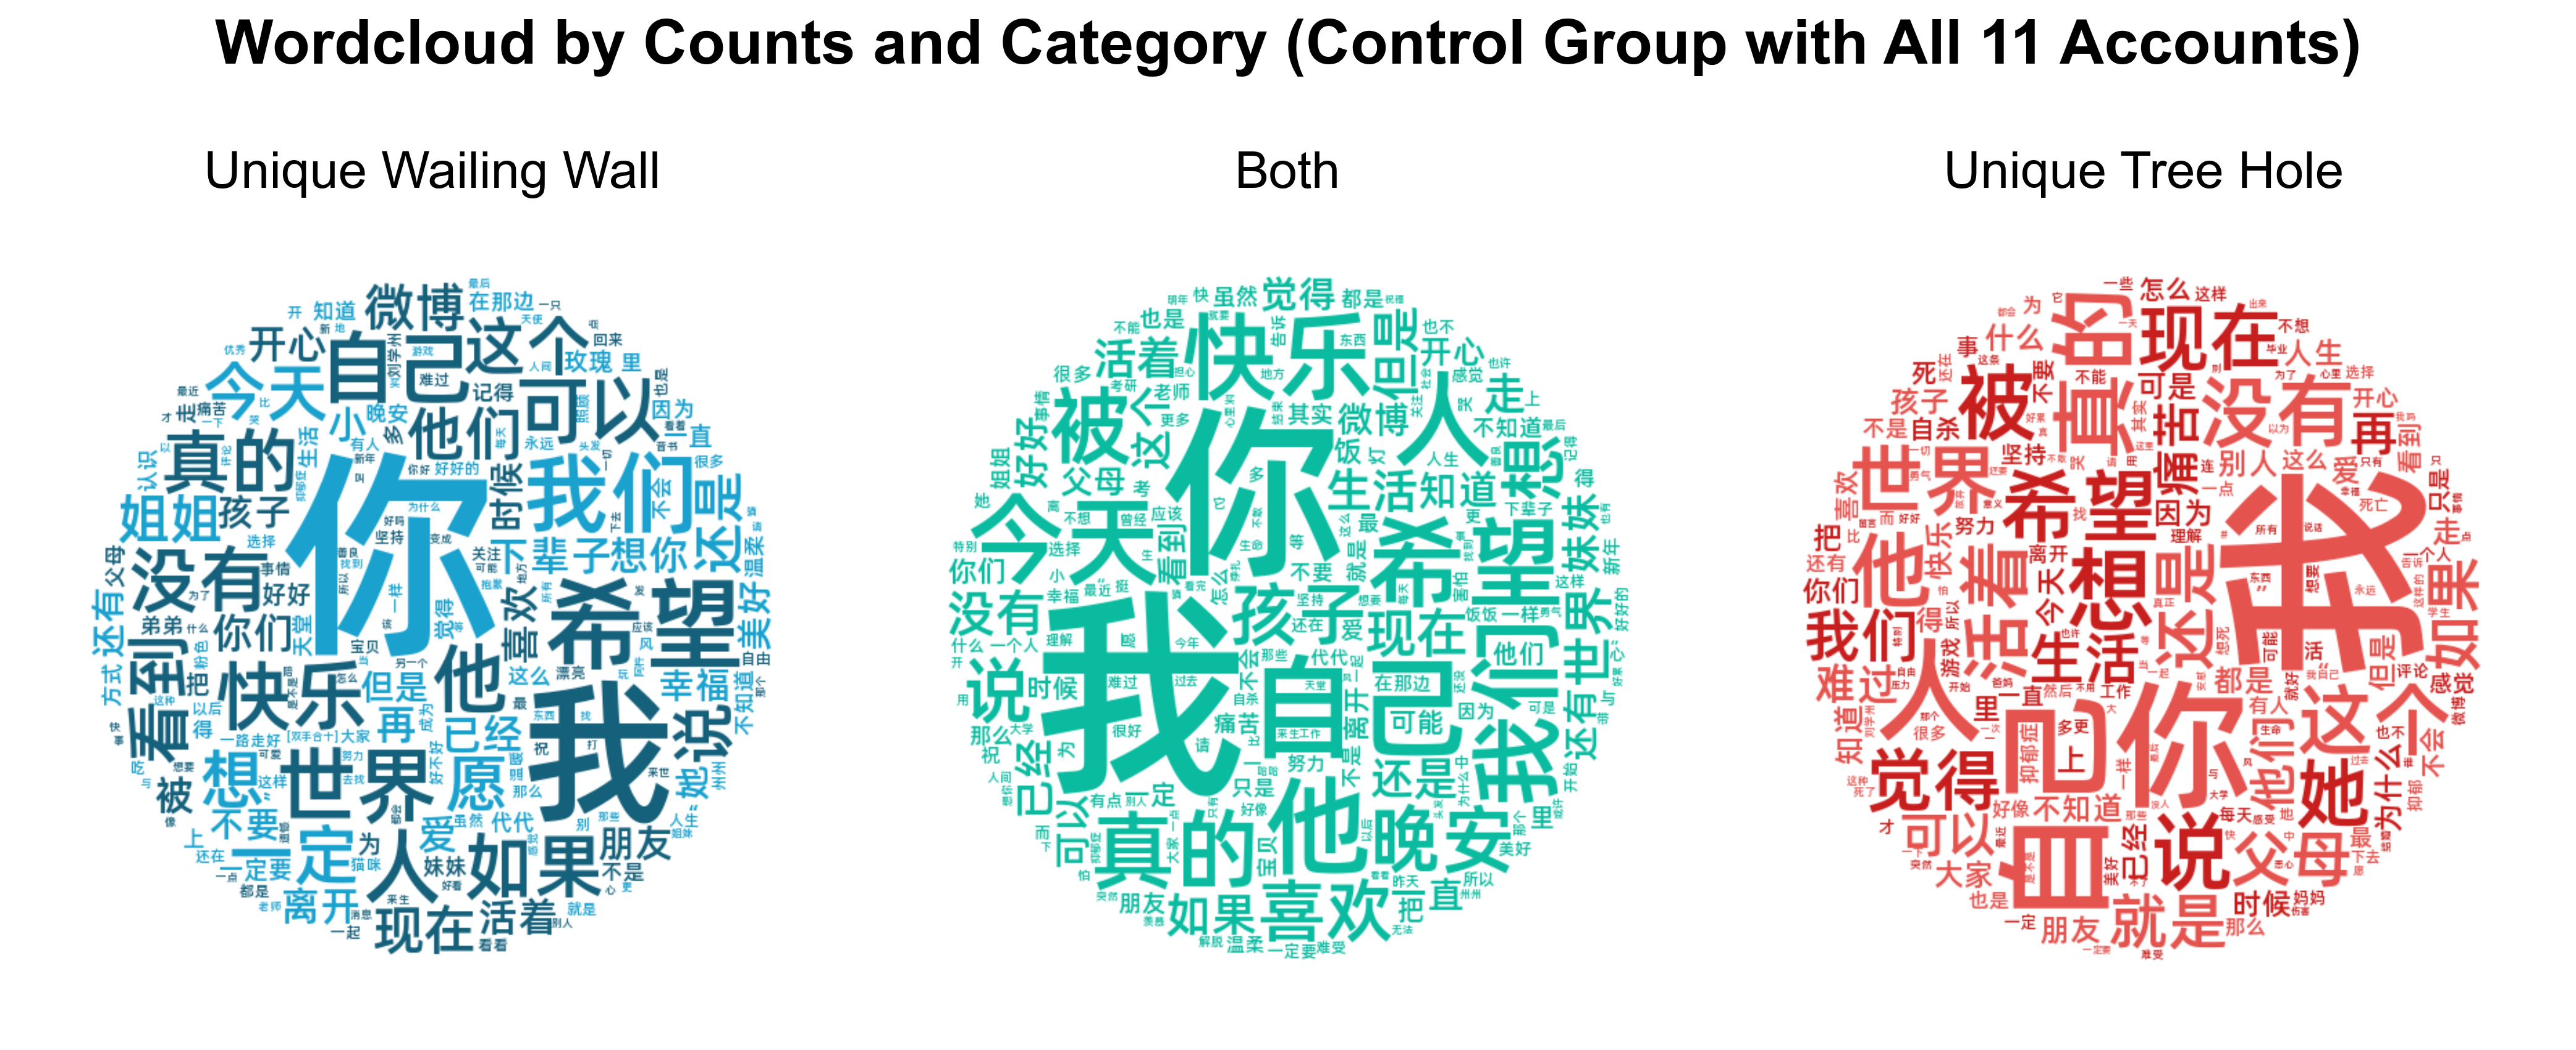

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
from os import path

word_dict_unique_wailing_wall = dict(zip(df_words_unique_wailing_wall_explode_count['Words'], df_words_unique_wailing_wall_explode_count['Unique Wailing Wall']))
word_dict_both = dict(zip(df_words_both_explode_count['Words'], df_words_both_explode_count['Both']))
word_dict_unique_tree_hole = dict(zip(df_words_unique_tree_hole_explode_count['Words'], df_words_unique_tree_hole_explode_count['Unique Tree Hole']))

# 将每个子图的数据集和标题放在同一个元组中，方便循环处理
word_datasets = [
    (word_dict_unique_wailing_wall, "Unique Wailing Wall"),
    (word_dict_both, "Both"),
    (word_dict_unique_tree_hole, "Unique Tree Hole"),
]
# 定义一个圆形 mask
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 250 ** 2
mask = 255 * mask.astype(int)

# 创建 3 * 1 的子图布局
fig = plt.figure(figsize=(14, 6), dpi=300)
gs = gridspec.GridSpec(nrows=1, ncols=3)
large_size = 24
font_path = 'external/Alibaba-PuHuiTi-Medium.ttf'

# 依次生成每个子图
for i, dataset in enumerate(word_datasets):
    word_dict, title = dataset
    if i == 0:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#15607a', '#1aa1cd']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial',fontsize=20)
    elif i == 1:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#0bbba0']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial', fontsize=20)
    elif i == 2:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#c71f1d', '#e4534e']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial', fontsize=20)
    else:
        pass
fig.suptitle("Wordcloud by Counts and Category (Control Group with All 11 Accounts)", fontsize=large_size, fontweight='bold', fontname='Arial', y=1)
fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()
fig.savefig('images/Wordcloud by Category.png', dpi=300)

#### **Distinctive Words**

In [190]:
df_words_all_explode_count_difference = df_words_all_explode_count[df_words_all_explode_count['All'] > 50]
df_words_all_explode_count_difference['Difference'] = (abs(df_words_all_explode_count_difference['Unique Wailing Wall'] - df_words_all_explode_count_difference['Unique Tree Hole']) / (df_words_all_explode_count_difference['Unique Wailing Wall'] + df_words_all_explode_count_difference['Unique Tree Hole'])) * 100
df_words_all_explode_count_difference = df_words_all_explode_count_difference.sort_values(by=['Difference'], ascending=False)
df_words_all_explode_count_difference.head(60)

Words   All  Unique Tree Hole  Unique Wailing Wall   Both  Difference
186  一路走好    52               1.0                 47.0    4.0   95.833333
130    玫瑰    67               2.0                 61.0    2.0   93.650794
119    代代    71               2.0                 56.0   13.0   93.103448
64     姐姐   116               4.0                 95.0   15.0   91.919192
146    宝贝    62               2.0                 45.0   15.0   91.489362
108   在那边    77               3.0                 60.0   14.0   90.476190
180    漂亮    53               3.0                 46.0    3.0   87.755102
181    粉色    52               3.0                 43.0    6.0   86.956522
157    天堂    59               4.0                 47.0    7.0   84.313725
86     想你    92               7.0                 78.0    7.0   83.529412
125    弟弟    69               6.0                 57.0    5.0   80.952381
84      小    93               8.0                 73.0   11.0   80.246914
141    认识    63               6.0                 50.0    2.0   78.571429
63    下辈子   116              13.0                 90.0   12.0   74.757282
1       你  3122             420.0               2336.0  333.0   69.521045
105    记得    77              11.0                 55.0    9.0   66.666667
178     开    53               8.0                 37.0    8.0   64.444444
54      愿   134              22.0                101.0   11.0   64.227642
103     死    78              58.0                 13.0    5.0   63.380282
185   好不好    52               9.0                 38.0    5.0   61.702128
89     妹妹    90              13.0                 53.0   23.0   60.606061
72     晚安   105              13.0                 53.0   38.0   60.606061
173    理解    54              35.0                  9.0    9.0   59.090909
94     温柔    85              15.0                 56.0   13.0   57.746479
144   好好的    62              11.0                 41.0   10.0   57.692308
168    工作    56              37.0                 10.0    7.0   57.446809
145    回来    62              12.0                 43.0    5.0   56.363636
75     幸福   102              20.0                 70.0   12.0   55.555556
170     吃    55              11.0                 38.0    3.0   55.102041
127    方式    68              14.0                 48.0    1.0   54.838710
112     祝    72              13.0                 44.0   14.0   54.385965
78     可是    99              67.0                 20.0    9.0   54.022989
71     别人   107              71.0                 23.0    7.0   51.063830
160    抑郁    57              37.0                 12.0    6.0   51.020408
115    关注    71              15.0                 45.0    8.0   50.000000
73    一定要   104              21.0                 63.0   13.0   50.000000
33     一定   165              37.0                108.0   18.0   48.965517
158    不想    58              35.0                 12.0    9.0   48.936170
132    虽然    67              13.0                 37.0   17.0   48.000000
36     微博   161              33.0                 93.0   21.0   47.619048
177    妈妈    53              36.0                 13.0    4.0   46.938776
129    其实    68              35.0                 13.0   17.0   45.833333
153     活    59              40.0                 15.0    4.0   45.454545
82     自杀    96              58.0                 22.0    9.0   45.000000
187     连    52              34.0                 13.0    3.0   44.680851
155     心    59              13.0                 34.0   12.0   44.680851
60     什么   122              75.0                 29.0   13.0   44.230769
116    看看    71              17.0                 43.0    6.0   43.333333
74     怎么   102              57.0                 23.0   14.0   42.500000
176    善良    53              13.0                 32.0    7.0   42.222222
169    温暖    55              15.0                 36.0    4.0   41.176471
189    一些    52              31.0                 13.0    5.0   40.909091
6      我们   356              86.0                205.0   51.0   40.893471
13     快

In [191]:
df_words_all_explode_count_difference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 186 to 67
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Words                192 non-null    object 
 1   All                  192 non-null    int64  
 2   Unique Tree Hole     192 non-null    float64
 3   Unique Wailing Wall  192 non-null    float64
 4   Both                 192 non-null    float64
 5   Difference           192 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.5+ KB


In [192]:
df_words_all_explode_count_difference.to_csv('word_counts_csv/df_words_all_explode_count.csv', index=False)
df_words_all_explode_count_difference = pd.read_csv('word_counts_csv/df_words_all_explode_count.csv')

In [193]:
words_count_unique_wailing_wall = df_words_all_explode_count_difference[df_words_all_explode_count_difference['Unique Wailing Wall'] > df_words_all_explode_count_difference['Unique Tree Hole']]
words_count_unique_tree_hole = df_words_all_explode_count_difference[df_words_all_explode_count_difference['Unique Tree Hole'] > df_words_all_explode_count_difference['Unique Wailing Wall']]

words_count_unique_wailing_wall = words_count_unique_wailing_wall.head(60)
words_count_unique_tree_hole = words_count_unique_tree_hole.head(60)

display(words_count_unique_wailing_wall)
display(words_count_unique_tree_hole)

words_count_unique_tree_hole.to_csv('word_counts_csv/lwl_words_count_unique_tree_hole.csv', index=False)
words_count_unique_wailing_wall.to_csv('word_counts_csv/lwl_words_count_unique_wailing_wall.csv', index=False)

Words   All  Unique Tree Hole  Unique Wailing Wall   Both  Difference
0    一路走好    52               1.0                 47.0    4.0   95.833333
1      玫瑰    67               2.0                 61.0    2.0   93.650794
2      代代    71               2.0                 56.0   13.0   93.103448
3      姐姐   116               4.0                 95.0   15.0   91.919192
4      宝贝    62               2.0                 45.0   15.0   91.489362
5     在那边    77               3.0                 60.0   14.0   90.476190
6      漂亮    53               3.0                 46.0    3.0   87.755102
7      粉色    52               3.0                 43.0    6.0   86.956522
8      天堂    59               4.0                 47.0    7.0   84.313725
9      想你    92               7.0                 78.0    7.0   83.529412
10     弟弟    69               6.0                 57.0    5.0   80.952381
11      小    93               8.0                 73.0   11.0   80.246914
12     认识    63               6.0                 50.0    2.0   78.571429
13    下辈子   116              13.0                 90.0   12.0   74.757282
14      你  3122             420.0               2336.0  333.0   69.521045
15     记得    77              11.0                 55.0    9.0   66.666667
16      开    53               8.0                 37.0    8.0   64.444444
17      愿   134              22.0                101.0   11.0   64.227642
19    好不好    52               9.0                 38.0    5.0   61.702128
20     妹妹    90              13.0                 53.0   23.0   60.606061
21     晚安   105              13.0                 53.0   38.0   60.606061
23     温柔    85              15.0                 56.0   13.0   57.746479
24    好好的    62              11.0                 41.0   10.0   57.692308
26     回来    62              12.0                 43.0    5.0   56.363636
27     幸福   102              20.0                 70.0   12.0   55.555556
28      吃    55              11.0                 38.0    3.0   55.102041
29     方式    68              14.0                 48.0    1.0   54.838710
30      祝    72              13.0                 44.0   14.0   54.385965
34     关注    71              15.0                 45.0    8.0   50.000000
35    一定要   104              21.0                 63.0   13.0   50.000000
36     一定   165              37.0                108.0   18.0   48.965517
38     虽然    67              13.0                 37.0   17.0   48.000000
39     微博   161              33.0                 93.0   21.0   47.619048
45      心    59              13.0                 34.0   12.0   44.680851
47     看看    71              17.0                 43.0    6.0   43.333333
49     善良    53              13.0                 32.0    7.0   42.222222
50     温暖    55              15.0                 36.0    4.0   41.176471
52     我们   356              86.0                205.0   51.0   40.893471
53     快乐   267              63.0                149.0   52.0   40.566038
56      发    54              14.0                 32.0    4.0   39.130435
60     好好   112              28.0                 62.0   21.0   37.777778
61      风    71              20.0                 44.0    6.0   37.500000
62     美好   114              33.0                 70.0   11.0   35.922330
63     希望   477             130.0                275.0   55.0   35.802469
64     以后    64              17.0                 35.0    8.0   34.615385
65     成为    60              18.0                 37.0    5.0   34.545455
66     看到   201              56.0                115.0   20.0   34.502924
74     自由    69              21.0                 40.0    6.0   31.147541
77     一起    77              23.0                 43.0    9.0   30.303030
78     离开   143              43.0                 79.0   19.0   29.508197
80      玩    53              18.0                 33.0    1.0   29.411765
83      该    52              16.0                 29.0    6.0   28.888889
86      别    66              20.0                 36.0    6.0   28.571429
87     永

Words   All  Unique Tree Hole  Unique Wailing Wall   Both  Difference
18      死    78              58.0                 13.0    5.0   63.380282
22     理解    54              35.0                  9.0    9.0   59.090909
25     工作    56              37.0                 10.0    7.0   57.446809
31     可是    99              67.0                 20.0    9.0   54.022989
32     别人   107              71.0                 23.0    7.0   51.063830
33     抑郁    57              37.0                 12.0    6.0   51.020408
37     不想    58              35.0                 12.0    9.0   48.936170
40     妈妈    53              36.0                 13.0    4.0   46.938776
41     其实    68              35.0                 13.0   17.0   45.833333
42      活    59              40.0                 15.0    4.0   45.454545
43     自杀    96              58.0                 22.0    9.0   45.000000
44      连    52              34.0                 13.0    3.0   44.680851
46     什么   122              75.0                 29.0   13.0   44.230769
48     怎么   102              57.0                 23.0   14.0   42.500000
51     一些    52              31.0                 13.0    5.0   40.909091
54     好像    67              40.0                 17.0    9.0   40.350877
55     感觉    91              54.0                 23.0   13.0   40.259740
57     也不    63              34.0                 15.0   11.0   38.775510
58    为什么   115              72.0                 32.0    8.0   38.461538
59     只是    83              45.0                 20.0   16.0   38.461538
67     觉得   179             100.0                 49.0   23.0   34.228188
68     毕业    52              30.0                 15.0    5.0   33.333333
69    一个人    72              40.0                 20.0   12.0   33.333333
70      @    51              14.0                  7.0    2.0   33.333333
71     不能    70              39.0                 20.0    9.0   32.203390
72     就是   157              91.0                 47.0   15.0   31.884058
73      被   260             141.0                 74.0   39.0   31.162791
75      而    71              38.0                 20.0   11.0   31.034483
76     努力    85              45.0                 24.0   14.0   30.434783
79     痛苦   140              79.0                 43.0   17.0   29.508197
81     自己   537             298.0                163.0   69.0   29.284165
82      中    57              29.0                 16.0   10.0   28.888889
84      我  3351            1795.0                995.0  513.0   28.673835
85     父母   177              92.0                 51.0   20.0   28.671329
88     难过   135              77.0                 44.0   10.0   27.272727
89     难受    57              29.0                 17.0   10.0   26.086957
90      她   223             117.0                 69.0   11.0   25.806452
91     每天    70              39.0                 23.0    7.0   25.806452
93      一    58              27.0                 16.0   13.0   25.581395
94     然后    57              32.0                 19.0    4.0   25.490196
95     人生   120              66.0                 40.0   11.0   24.528302
96     生命    60              28.0                 17.0    8.0   24.444444
101   抑郁症    81              42.0                 26.0    7.0   23.529412
102    生活   168              85.0                 53.0   28.0   23.188406
104     想   316             169.0                107.0   34.0   22.463768
105     人   529             270.0                172.0   61.0   22.171946
106    开始    57              28.0                 18.0   10.0   21.739130
108    就好    54              31.0                 20.0    3.0   21.568627
109    一点    70              35.0                 23.0    7.0   20.689655
110    坚持    97              52.0                 35.0    9.0   19.540230
112    下去    63              34.0                 23.0    5.0   19.298246
113     更    74              35.0                 24.0   12.0   18.644068
114    大家   135              67.0                 46.0    9.0   18.584071
116     

In [194]:
words_count_unique_wailing_wall = words_count_unique_wailing_wall.sort_values(by=['Unique Wailing Wall'], ascending=False)
words_count_unique_tree_hole = words_count_unique_tree_hole.sort_values(by=['Unique Tree Hole'], ascending=False)

display(words_count_unique_wailing_wall)
display(words_count_unique_tree_hole)

Words   All  Unique Tree Hole  Unique Wailing Wall   Both  Difference
14      你  3122             420.0               2336.0  333.0   69.521045
63     希望   477             130.0                275.0   55.0   35.802469
52     我们   356              86.0                205.0   51.0   40.893471
53     快乐   267              63.0                149.0   52.0   40.566038
92     可以   253              82.0                139.0   21.0   25.791855
66     看到   201              56.0                115.0   20.0   34.502924
36     一定   165              37.0                108.0   18.0   48.965517
103    今天   220              64.0                102.0   52.0   22.891566
17      愿   134              22.0                101.0   11.0   64.227642
3      姐姐   116               4.0                 95.0   15.0   91.919192
39     微博   161              33.0                 93.0   21.0   47.619048
13    下辈子   116              13.0                 90.0   12.0   74.757282
78     离开   143              43.0                 79.0   19.0   29.508197
9      想你    92               7.0                 78.0    7.0   83.529412
100    开心   143              47.0                 76.0   20.0   23.577236
11      小    93               8.0                 73.0   11.0   80.246914
27     幸福   102              20.0                 70.0   12.0   55.555556
62     美好   114              33.0                 70.0   11.0   35.922330
99     还有   131              41.0                 67.0   21.0   24.074074
35    一定要   104              21.0                 63.0   13.0   50.000000
60     好好   112              28.0                 62.0   21.0   37.777778
1      玫瑰    67               2.0                 61.0    2.0   93.650794
5     在那边    77               3.0                 60.0   14.0   90.476190
10     弟弟    69               6.0                 57.0    5.0   80.952381
2      代代    71               2.0                 56.0   13.0   93.103448
23     温柔    85              15.0                 56.0   13.0   57.746479
15     记得    77              11.0                 55.0    9.0   66.666667
21     晚安   105              13.0                 53.0   38.0   60.606061
20     妹妹    90              13.0                 53.0   23.0   60.606061
12     认识    63               6.0                 50.0    2.0   78.571429
29     方式    68              14.0                 48.0    1.0   54.838710
8      天堂    59               4.0                 47.0    7.0   84.313725
0    一路走好    52               1.0                 47.0    4.0   95.833333
87     永远    78              26.0                 46.0    6.0   27.777778
6      漂亮    53               3.0                 46.0    3.0   87.755102
4      宝贝    62               2.0                 45.0   15.0   91.489362
34     关注    71              15.0                 45.0    8.0   50.000000
30      祝    72              13.0                 44.0   14.0   54.385965
61      风    71              20.0                 44.0    6.0   37.500000
26     回来    62              12.0                 43.0    5.0   56.363636
7      粉色    52               3.0                 43.0    6.0   86.956522
77     一起    77              23.0                 43.0    9.0   30.303030
47     看看    71              17.0                 43.0    6.0   43.333333
24    好好的    62              11.0                 41.0   10.0   57.692308
74     自由    69              21.0                 40.0    6.0   31.147541
28      吃    55              11.0                 38.0    3.0   55.102041
19    好不好    52               9.0                 38.0    5.0   61.702128
65     成为    60              18.0                 37.0    5.0   34.545455
38     虽然    67              13.0                 37.0   17.0   48.000000
16      开    53               8.0                 37.0    8.0   64.444444
98    刘学州    66              22.0                 36.0    6.0   24.137931
86      别    66              20.0                 36.0    6.0   28.571429
50     温暖    55              15.0                 36.0    4.0   41.176471
64     以

Words   All  Unique Tree Hole  Unique Wailing Wall   Both  Difference
84      我  3351            1795.0                995.0  513.0   28.673835
81     自己   537             298.0                163.0   69.0   29.284165
105     人   529             270.0                172.0   61.0   22.171946
104     想   316             169.0                107.0   34.0   22.463768
122     说   304             146.0                105.0   35.0   16.334661
73      被   260             141.0                 74.0   39.0   31.162791
90      她   223             117.0                 69.0   11.0   25.806452
67     觉得   179             100.0                 49.0   23.0   34.228188
85     父母   177              92.0                 51.0   20.0   28.671329
72     就是   157              91.0                 47.0   15.0   31.884058
102    生活   168              85.0                 53.0   28.0   23.188406
79     痛苦   140              79.0                 43.0   17.0   29.508197
88     难过   135              77.0                 44.0   10.0   27.272727
123   不知道   155              76.0                 55.0   17.0   16.030534
46     什么   122              75.0                 29.0   13.0   44.230769
58    为什么   115              72.0                 32.0    8.0   38.461538
32     别人   107              71.0                 23.0    7.0   51.063830
114    大家   135              67.0                 46.0    9.0   18.584071
31     可是    99              67.0                 20.0    9.0   54.022989
95     人生   120              66.0                 40.0   11.0   24.528302
127    都是   132              64.0                 47.0   16.0   15.315315
43     自杀    96              58.0                 22.0    9.0   45.000000
18      死    78              58.0                 13.0    5.0   63.380282
48     怎么   102              57.0                 23.0   14.0   42.500000
55     感觉    91              54.0                 23.0   13.0   40.259740
110    坚持    97              52.0                 35.0    9.0   19.540230
59     只是    83              45.0                 20.0   16.0   38.461538
76     努力    85              45.0                 24.0   14.0   30.434783
116     事    83              45.0                 31.0    7.0   18.421053
101   抑郁症    81              42.0                 26.0    7.0   23.529412
42      活    59              40.0                 15.0    4.0   45.454545
54     好像    67              40.0                 17.0    9.0   40.350877
69    一个人    72              40.0                 20.0   12.0   33.333333
91     每天    70              39.0                 23.0    7.0   25.806452
71     不能    70              39.0                 20.0    9.0   32.203390
75      而    71              38.0                 20.0   11.0   31.034483
25     工作    56              37.0                 10.0    7.0   57.446809
33     抑郁    57              37.0                 12.0    6.0   51.020408
118    评论    82              36.0                 25.0    2.0   18.032787
40     妈妈    53              36.0                 13.0    4.0   46.938776
113     更    74              35.0                 24.0   12.0   18.644068
109    一点    70              35.0                 23.0    7.0   20.689655
22     理解    54              35.0                  9.0    9.0   59.090909
41     其实    68              35.0                 13.0   17.0   45.833333
37     不想    58              35.0                 12.0    9.0   48.936170
44      连    52              34.0                 13.0    3.0   44.680851
57     也不    63              34.0                 15.0   11.0   38.775510
112    下去    63              34.0                 23.0    5.0   19.298246
94     然后    57              32.0                 19.0    4.0   25.490196
108    就好    54              31.0                 20.0    3.0   21.568627
51     一些    52              31.0                 13.0    5.0   40.909091
126    这种    61              30.0                 22.0    4.0   15.384615
68     毕业    52              30.0                 15.0    5.0   33.333333
124     

In [195]:
#Translate Emojis
from emojiswitch import emojize, demojize
words_count_unique_wailing_wall['Words'] = words_count_unique_wailing_wall['Words'].apply(lambda x: demojize(x, delimiters=('[',']'), lang='zh'))
words_count_unique_tree_hole['Words'] = words_count_unique_tree_hole['Words'].apply(lambda x: demojize(x, delimiters=('[',']'), lang='zh'))

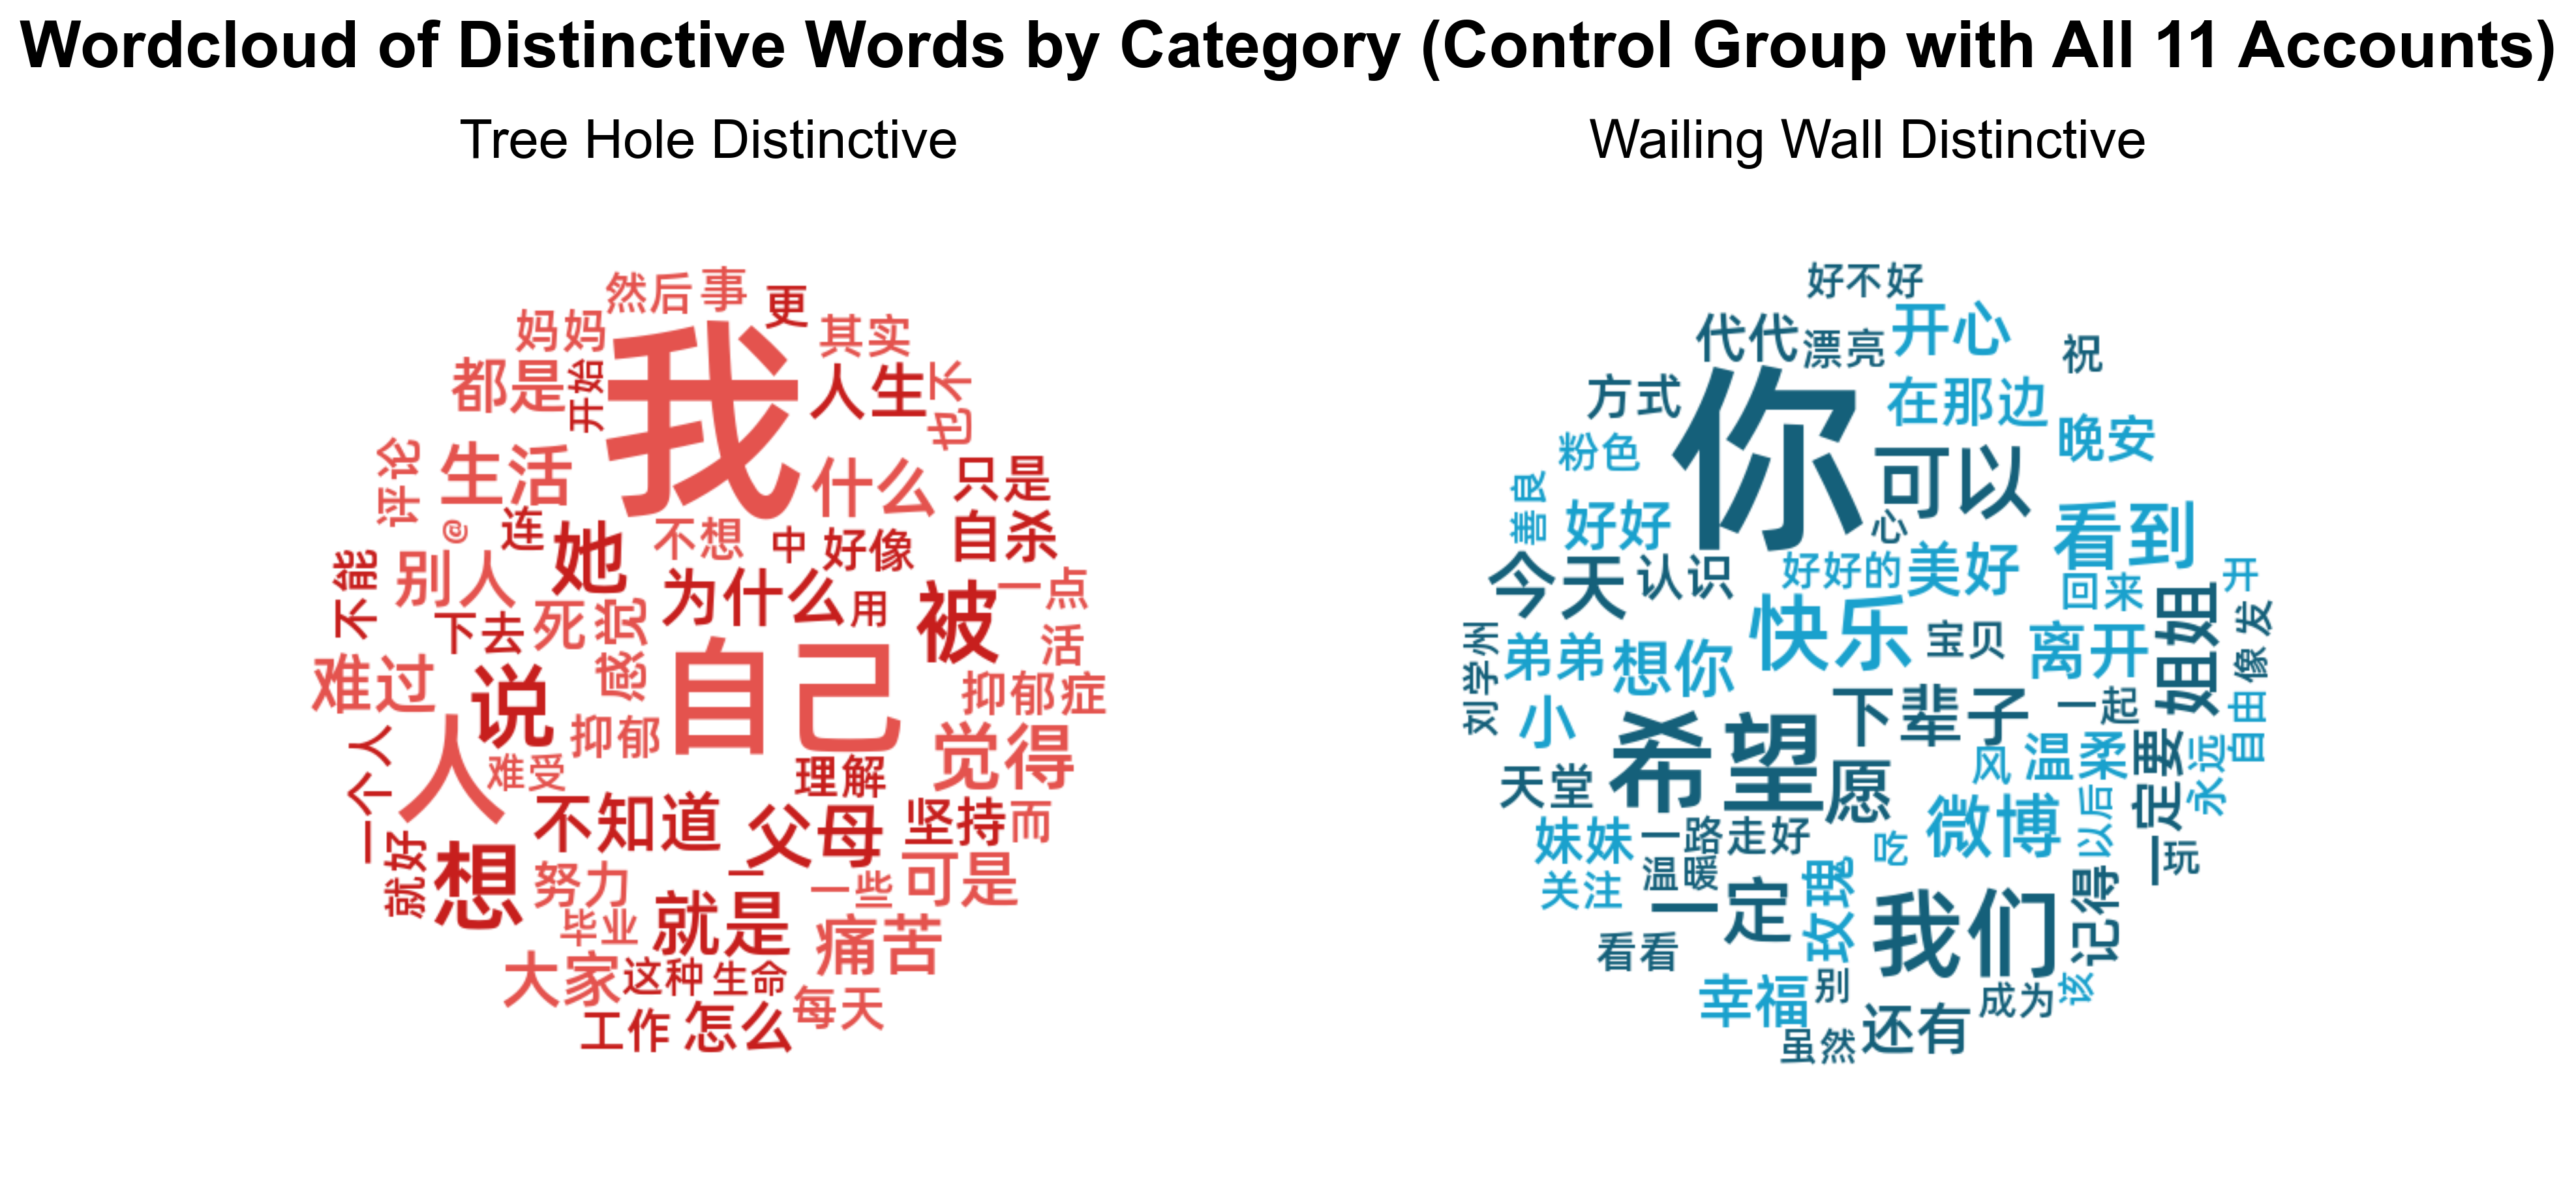

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import gridspec
from matplotlib.colors import ListedColormap

word_dict_tree_hole = dict(zip(words_count_unique_tree_hole['Words'], words_count_unique_tree_hole['Unique Tree Hole']))
word_dict_wailing_wall = dict(zip(words_count_unique_wailing_wall['Words'], words_count_unique_wailing_wall['Unique Wailing Wall']))

# 将每个子图的数据集和标题放在同一个元组中，方便循环处理
word_datasets = [
    (word_dict_tree_hole, "Tree Hole Distinctive"),
    (word_dict_wailing_wall, "Wailing Wall Distinctive"),
]
# 定义一个圆形 mask
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 250 ** 2
mask = 255 * mask.astype(int)

# 创建 3 * 1 的子图布局
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = gridspec.GridSpec(nrows=1, ncols=2)
large_size = 24
font_path = 'external/Alibaba-PuHuiTi-Medium.ttf'

# 依次生成每个子图
for i, dataset in enumerate(word_datasets):
    word_dict, title = dataset
    if i == 0:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#c71f1d', '#e4534e']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial', fontsize=20)
    elif i == 1:
        wc = WordCloud(
            background_color="white",
            width=1200,
            height=1000,
            colormap=ListedColormap(['#15607a', '#1aa1cd']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial', fontsize=20)
    else:
        pass
fig.suptitle("Wordcloud of Distinctive Words by Category (Control Group with All 11 Accounts)", fontsize=large_size, fontweight='bold', fontname='Arial', y=1)
fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()
fig.savefig('images/Distinctive Wordcloud by Category All 11 accounts.png', dpi=300)